# HW8_Part 2_Citi Bikes: Testing

In [1]:
# Stating all the packages here
from __future__  import print_function, division
import matplotlib.pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats

%pylab inline

if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")


import os
import json
#s = json.load( open(os.getenv('PUI2016') + "/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

from evalChisq import evalChisq

Populating the interactive namespace from numpy and matplotlib


## Statements
In summer, there tends to be more tourists in New York City. Especially, during the weekend, with less traffic we can expect more short-term riders (i.e. 24-your or 3-day pass; recorded as customer in usertype). In this assignment, I would use the month August representing summer.  Therefore, I am expecting a higher porportion of customer riders during the weekend in August than weekdays. The studying year is 2017.

Another reason I chose August is because, August does not have a long weekend and therefore, the weekday versus weekend comparison can be relatively more clearer. 

### Null Hypothesis

In 2017 August, The proportion of short-term users during the weekend are not significantly higher than the proportion of short-term users during weekdays. 

### Revised Hypothesis (thanks to cb4221's suggestion)
In August 2017, the proportion of short-term users during the weekend is the same or lower than the proportion of short-term users during weekdays.

### Alternative Hypothesis

In 2017 August, The proportion of short-term users during the weekend are higher than the proportion of short-term users during weekdays. 

# _$H_0$_ : $\frac{R_{\mathrm{cus-Weekend}}}{R_{\mathrm{total-Weekend}}} <= \frac{R_{\mathrm{cus-Weekday}}}{R_{\mathrm{total-Weekday}}}$
# _$H_1$_ : $\frac{R_{\mathrm{cus-Weekend}}}{R_{\mathrm{total-Weekend}}} > \frac{R_{\mathrm{cus-Weekday}}}{R_{\mathrm{total-Weekday}}}$

or identically:

# _$H_0$_ : $\frac{R_{\mathrm{cus-Weekend}}}{R_{\mathrm{total-Weekend}}} - \frac{R_{\mathrm{cus-Weekday}}}{R_{\mathrm{total-Weekday}}} <= 0 $
# _$H_1$_ : $\frac{R_{\mathrm{cus-Weekend}}}{R_{\mathrm{total-Weekend}}} - \frac{R_{\mathrm{cus-Weekday}}}{R_{\mathrm{total-Weekday}}} > 0$
## The significance level chosen is  $\alpha=0.05$

#### which means i want the probability of getting a result at least as significant as mine to be less then 5%


In [2]:
import pandas as pd
import numpy as py
import os
import sys
import zipfile

## Environmental Prep

In [3]:
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

In [4]:
#!curl https://s3.amazonaws.com/tripdata/201701-citibike-tripdata.csv.zip > Jan2017citibike.csv.zip
#!curl https://s3.amazonaws.com/tripdata/201708-citibike-tripdata.csv.zip > Aug2017citibike.csv.zip

In [5]:
#2017Augbike = Aug2017citibike.csv.zip.ZipFile(os.getenv("PUIDATA"), 'r')
#2017Augbike.extractall(os.getenv("PUIDATA"))
#2017Augbike.close()
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")


In [6]:
datestring = '201708'
getCitiBikeCSV(datestring)

file in place, you can continue


In [7]:
!ls $PUIDATA

201501-citibike-tripdata.csv
201501-citibike-tripdata.zip
2015_Street_Tree_Census_-_Tree_Data.csv
201701-citibike-tripdata.csv
201702-citibike-tripdata.zip
201708-citibike-tripdata.csv
ACS_16_1YR_GCT2801.ST50_metadata.csv
ACS_16_1YR_GCT2801.ST50.txt
ACS_16_1YR_GCT2801.ST50_with_ann.csv
acs16_final.csv
aff_download_readme_ann.txt
aff_download.zip
Aug2017citibike.csv.zip
BK_18v1.csv
Borough
Borough Boundaries.zip
Bus Data.csv
DCAS_Managed_Building_Fuel_Usage.csv
DSNY_Monthly_Tonnage_Data.csv
geo_export_ffb7952a-206b-42af-b836-54db05e251b7.dbf
geo_export_ffb7952a-206b-42af-b836-54db05e251b7.prj
geo_export_ffb7952a-206b-42af-b836-54db05e251b7.shp
geo_export_ffb7952a-206b-42af-b836-54db05e251b7.shx
gittest_lavz
HW5_yc3763_Assignment1.ipynb
Jan2017citibike.csv.zip
MN_18v1.csv
neighbourhoods_planning_areas_wgs84.zip
ntrees.csv
nwxe-4ae8.csv
PUMA
PUMA.gz
tonnage.csv
Toronto
Treasure^C
treehealth.csv
TRT.gz
Zipcode
ZipCode
ZIP_CODE_040114.dbf
ZIP_CODE_040114.prj
ZIP_CODE_040114.sbn
ZIP_CODE_040

# CitiBike Data Wangling

In [8]:
#Jan2017=pd.read_csv("%s/201701-citibike-tripdata.csv"%os.getenv("PUIDATA"))
Aug2017 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

In [9]:
Aug2017.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,2110,2017-08-01 00:00:00,2017-08-01 00:35:11,470,W 20 St & 8 Ave,40.743453,-74.000040,3289,W 90 St & Amsterdam Ave,40.790179,-73.972889,20954,Subscriber,1978.0,2
1,160,2017-08-01 00:00:10,2017-08-01 00:02:51,348,W Broadway & Spring St,40.724910,-74.001547,151,Cleveland Pl & Spring St,40.722104,-73.997249,15164,Subscriber,1978.0,1
2,1644,2017-08-01 00:00:17,2017-08-01 00:27:41,3165,Central Park West & W 72 St,40.775794,-73.976206,3320,Central Park West & W 100 St,40.793393,-73.963556,17540,Subscriber,1962.0,2
3,323,2017-08-01 00:00:27,2017-08-01 00:05:51,389,Broadway & Berry St,40.710446,-73.965251,3073,Division Ave & Hooper St,40.706913,-73.954417,18705,Subscriber,1990.0,1
4,109,2017-08-01 00:00:41,2017-08-01 00:02:31,3145,E 84 St & Park Ave,40.778627,-73.957721,3147,E 85 St & 3 Ave,40.778012,-73.954071,27975,Subscriber,1983.0,1


In [10]:
Aug2017.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [11]:
Aug2017R=Aug2017.drop(['tripduration', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', 'gender'], axis=1)

In [12]:
Aug2017R.head(5)

,starttime,usertype
0,2017-08-01 00:00:00,Subscriber
1,2017-08-01 00:00:10,Subscriber
2,2017-08-01 00:00:17,Subscriber
3,2017-08-01 00:00:27,Subscriber
4,2017-08-01 00:00:41,Subscriber


In [13]:
len(Aug2017R)

1816498

## Obtaining the value in each Usertype group

In [14]:
Aug2017R['usertype'].unique()

array(['Subscriber', 'Customer'], dtype=object)

In [15]:
RiderN = Aug2017R.groupby('usertype')['starttime'].count()
print (RiderN)

usertype
Customer       258059
Subscriber    1558439
Name: starttime, dtype: int64


## Obtaining the value groupped into each weekday

In [16]:
# Count of total riders on each day
Aug2017R['date'] = pd.to_datetime(Aug2017R['starttime'])
RiderD = Aug2017R['usertype'].groupby(Aug2017R['date'].dt.weekday).count()
print (RiderD)

date
0    206822
1    280064
2    322903
3    330242
4    220371
5    232062
6    224034
Name: usertype, dtype: int64


In [17]:
#Aug2017R['starttime']
#Aug2017R['starttime'].dt.weekday
# Count of customers (short-term riders) throughout the week

C = Aug2017R['usertype'] =='Customer'
Ci = Aug2017R['date'][C]
CN = Ci.groupby([Aug2017R['date'].dt.weekday]).count()
CN

date
0    21186
1    22830
2    31360
3    32780
4    26377
5    63552
6    59974
Name: date, dtype: int64

In [18]:
# Count of subscribers throughout the week
S = Aug2017R['usertype'] =='Subscriber'
Si = Aug2017R['date'][S]
SN = Si.groupby([Aug2017R['date'].dt.weekday]).count()
print(SN)

date
0    185636
1    257234
2    291543
3    297462
4    193994
5    168510
6    164060
Name: date, dtype: int64


## Plotting the Absolute Counts on each Weekday

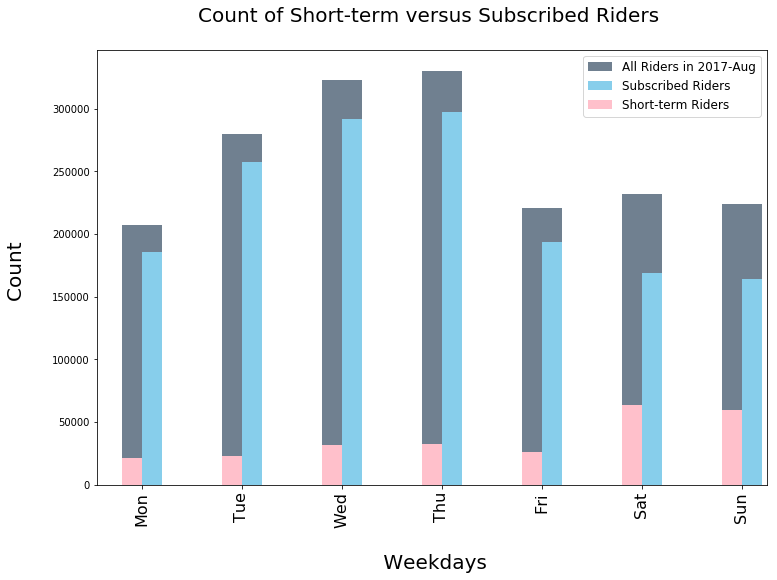

In [19]:
# Plot the porportation Customer vs Subscriber on different days (from Monday to Sunday)
# Colour Dictionary: https://en.wikipedia.org/wiki/Web_colors
# Plot dictionary: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
plotbiker = pl.figure(figsize=(12,8))

set3 = RiderD.plot(kind='bar', color='#708090', width=0.4,label='All Riders in 2017-Aug' )
set2 = SN.plot(kind='bar', color='#87CEEB', position=0, width = 0.2, label='Subscribed Riders')
set1 = CN.plot(kind='bar', color='#FFC0CB', position=1, width = 0.2, label='Short-term Riders')

set1.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=16)
#set2.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=16)
set1.set_xlabel('\n Weekdays', fontsize=20)
set1.set_ylabel('Count \n', fontsize=20)
set1.set_title('Count of Short-term versus Subscribed Riders \n', fontsize = 20)
pl.legend(fontsize=12)

## Figure 1a: 
The plot shows the absolute count for short-term riders (customers) throughout the week. In contrast, subscibers counts are also demonstrated. We can see the counts goes up during the weekends for short-term riders comparing to subscribers' count going down during weekends. In general we can see that there are way more subscribers using Citibikes than short-term riders which can be due to, many short-term riders are considered tourists and they are possibly not very familiar with the road condition in NYC so prefer to take public transit. 

## Normalize the counts by Total Riders

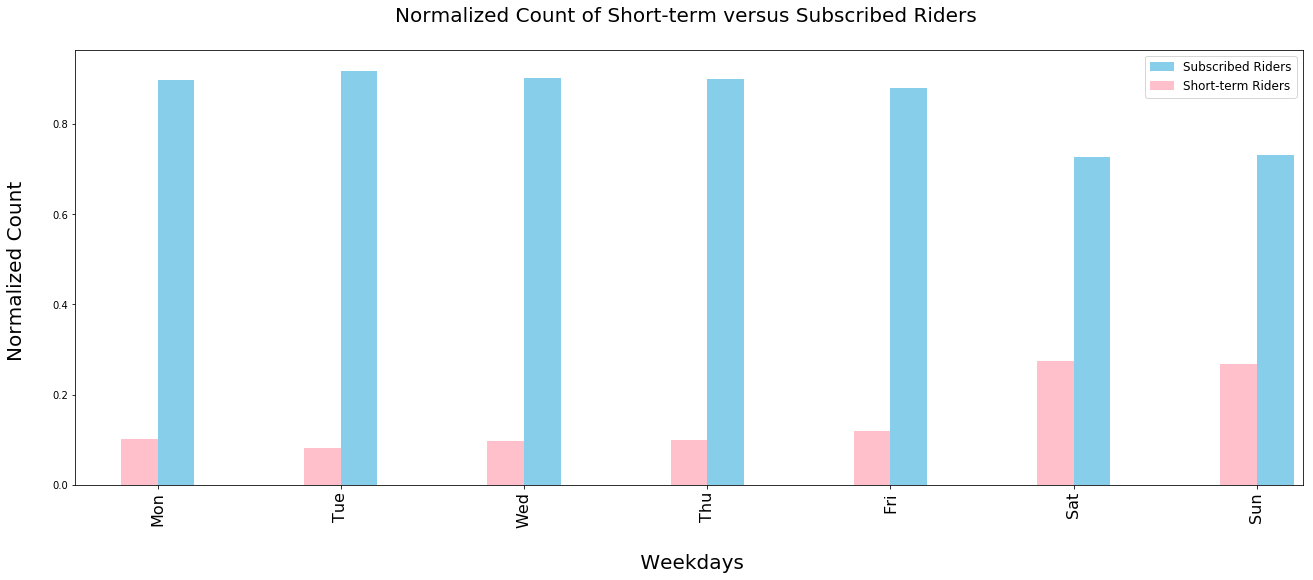

In [41]:
# Normalize the customer of each day count by total riders of each day
# Plot the porportation Customer vs Subscriber on different days (from Monday to Sunday)

plotbikerNT = pl.figure(figsize=(22,8))

# Set up the formula for usertype count normalized by all the riders on each day
RatioNC = CN/RiderD
RatioNS = SN/RiderD

# Plotting
setNT2 = RatioNS.plot(kind='bar', color='#87CEEB', position=0, width=0.2, label='Subscribed Riders')
setNT1 = RatioNC.plot(kind='bar', color='#FFC0CB', position=1, width=0.2, label='Short-term Riders')
setNT1.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=16)
setNT2.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=16)
setNT1.set_xlabel('\n Weekdays', fontsize=20)
setNT2.set_ylabel('Normalized Count \n', fontsize=20)
setNT1.set_title('Normalized Count of Short-term versus Subscribed Riders \n', fontsize = 20)
pl.legend(fontsize=12)

## Figure 1b: 
The plot shows the normalized count for short-term riders (customers) throughout the week. In contrast, subscibers normalized counts are also demonstrated. We can see the normalized counts goes up during the weekends for short-term riders, comparing to subscribers' normalized count decreased over the weekends. 

## Normalize the counts by standard errors


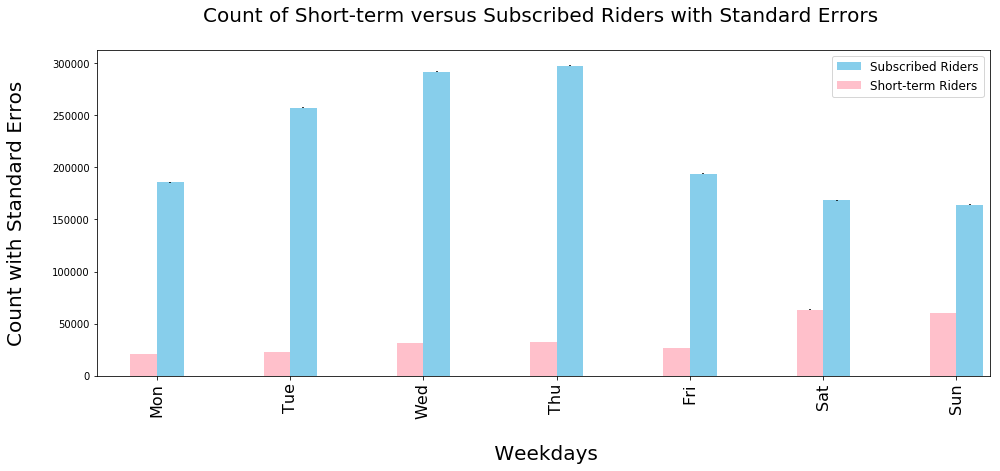

In [43]:
# Normalize the customer count by total riders
# Plot the porportation Customer vs Subscriber on different days (from Monday to Sunday)

plotbikerSE = pl.figure(figsize=(16,6))

# Set up the formula for usertype standard error all the riders on each day
SE=np.sqrt(RiderD)
SENC = CN/SE
SENS = SN/SE

# Plotting
setNT2 = SN.plot(kind='bar', yerr =[SENS, SENS], position=0, width=0.2, color='#87CEEB', label='Subscribed Riders')
setNT1 = CN.plot(kind='bar', yerr =[SENC, SENC], position=1, width=0.2, color='#FFC0CB', label='Short-term Riders')
setNT1.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=16)
setNT2.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=16)
setNT1.set_xlabel('\n Weekdays', fontsize=20)
setNT2.set_ylabel('Count with Standard Erros\n', fontsize=20)
setNT1.set_title('Count of Short-term versus Subscribed Riders with Standard Errors \n', fontsize = 20)
pl.legend(fontsize=12)

## Figure 1c: 
This figure shows the counts applied with standard errors. The over trend is similar to absolute counts 

## Testing 
Thanks to cb 4221, I read more about the tests suggested and decided that Mann-Whitney U test would be more appropriate for testing my project. 

The Mann-Whitney U test focuses on finding out the randomly selected values from one sample will be less than or greater than a randomly selected value from a second sample. Therefore in my case, I am extracting two random samples from the overall the weekend dataset and the weekday dataset and see if the proportion of customer rider is higher for the weekend than the customer rider. 

The section below shows the process of preparing samples for testing. 

In [22]:
Weekday = Aug2017R['usertype'].groupby(Aug2017R['date'].dt.weekday).count()
Weekday

date
0    206822
1    280064
2    322903
3    330242
4    220371
5    232062
6    224034
Name: usertype, dtype: int64

In [23]:
# Adding Weekday number into my dataset
Aug2017R['Day'] = Aug2017R['date'].dt.weekday
Aug2017R.head(3)

,starttime,usertype,date,Day
0,2017-08-01 00:00:00,Subscriber,2017-08-01 00:00:00,1
1,2017-08-01 00:00:10,Subscriber,2017-08-01 00:00:10,1
2,2017-08-01 00:00:17,Subscriber,2017-08-01 00:00:17,1


In [24]:
Aug2017R.Day.unique()

array([1, 2, 3, 4, 5, 6, 0])

In [25]:
Aug2017R_wd=Aug2017R[Aug2017R.Day.between(0,4)]
Aug2017R_wd.usertype.unique()

array(['Subscriber', 'Customer'], dtype=object)

In [26]:
Aug2017R_wk=Aug2017R[Aug2017R.Day.between(5,6)]

In [27]:
# Extracing 5000 samples from weekday data
np.random.seed(12345)
wd=np.random.choice(Aug2017R_wd.usertype, 5000)

In [28]:
# Extracing 5000 samples from weekend data

wk=np.random.choice(Aug2017R_wk.usertype, 5000)

## Testing 1: Mann-Whitney U Test

In [29]:
scipy.stats.mannwhitneyu(wd, wk)

MannwhitneyuResult(statistic=10312500.0, pvalue=3.47581003807178e-52)

## Interpretations:
The MWU statistics is huge while the pvalue is very small. Therefore, it is likely that the hypothesis can be rejected. 

## Testing 2: Chi-Square test

I compared this Citibike scenario to NYC prison program employment and noticed that there are some similarities so I performed an extra test here to test my null hypothesis. The two catogories are weekday vs weekend and here, I am looking at the proportion of subscribers and customers. 

In [30]:
wd_C=np.count_nonzero(wd=='Customer')
wd_S=np.count_nonzero(wd=='Subscriber')
print('Weekday Customer:', wd_C, '\nWeekday Subscriber:', wd_S)

Weekday Customer: 516 
Weekday Subscriber: 4484


In [31]:
wk_C=np.count_nonzero(wk=='Customer')
wk_S=np.count_nonzero(wk=='Subscriber')
print('Weekend Customer:', wk_C, '\nWeekend Subscriber:', wk_S)

Weekend Customer: 1391 
Weekend Subscriber: 3609


Contingency Table 
Probability Calculation:
Weekday Customer Rider = 516/5000 = 10.32%
Weekday Non-customer Rider = 4484/5000 = 89.68%
Weekend Customer Rider = 1391/5000 = 27.82%
Weekend Non-customer Rider = 3609/5000 = 72.18%

|Customer Rider     |     Yes   | No        | Total                  
|---------------------------|-----------|-----------|----------------|
|Weekday                |5000 * 0.1032  |5000 * 0.8968  |  5000           |
|Weekend            |5000 * 0.2782|5000 * 0.7218|  5000           |
|                           |           |           |                |
| total                     |   1907     | 8093       |  10000           |

In [32]:
sample_values = np.array([[wd_C, wd_S], [wk_C, wk_S]])
a=evalChisq(sample_values)

print (a)

496.3077253245598


## Interpretations:
The result is way bigger than 3.84 which corresponds to 0.05 significance level. Therefore, we can reject the null hypothesis.

## Testing 3: Fischer's Exact Test

Usinf the same contingency table from chi-square test.


In [33]:
scipy.stats.fisher_exact([[wd_C, wd_S], [wk_C, wk_S]])

(0.29856840617426544, 5.039138305898606e-113)

## Interpretation:
The p value of the fisher exact test is way smaller than 0.05. Therefore, the null hypothesis can be rejected.

## Further Comments:
Mann-Whitney U test aims for samples with identical distribution. In this case, it is unknown. 

Fisher's Exact test is appropriate for 2 by 2 contingency table. However, it normally substitutes Chi-square when samples are small and are sparsely distributed which is not this case. 

For Chi-square test, the two variables are independent, which in this project, subscribers are independent of customers. Particularly in this project, chi-square test for equality of proportions is used. Therefore, three methods were used but chi-square might be the best choice. 